<a href="https://colab.research.google.com/github/pedro-de-bastos/CS146/blob/master/CS146_PCW_6_2%3A%20Dirichlet%20Conjugate%20Priors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Dirichlet Conjugate Priors

In [82]:
#Importing the data
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://gist.githubusercontent.com/cscheffler/482412b75d7b7c8ab83dd86e81d71403/raw/9ed65a9d2bb8455e4b225400f57f2d77f851aec9/socialmobility.csv")

#Defining my posterior hyperparameter according to the conjugate prior and the
#data:
posterior_hyper = data['count']+1

In [31]:
data

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


95% Confidence interval is: [0.31151356 0.33815004]


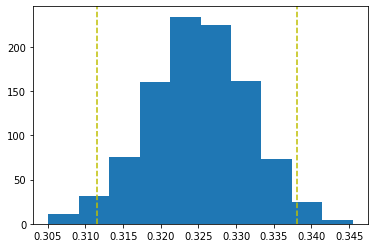

In [80]:
#Sampling from the posterior dirichlet distribution for probabilities
test = stats.dirichlet.rvs(posterior_hyper, size=1000)

#Computing the conditional probability
prob_unskilled_father = np.asarray([sum(i) for i in test[:,4:8]])
prob_skilled_son_and_unskilled_father = test[:,6]
prob_skilled_son_given_unskilled_father = prob_skilled_son_and_unskilled_father/prob_unskilled_father

#Getting and plotting the quantiles
quantiles = np.quantile(prob_skilled_son_given_unskilled_father, [0.025, 0.975])
print(f'95% Confidence interval is: {quantiles}')
plt.hist(prob_skilled_son_given_unskilled_father)
plt.axvline(x=quantiles[0], ls='--', color='y')
plt.axvline(x=quantiles[1], ls='--', color='y')

95% Confidence interval is: [0.12422435 0.13806519]


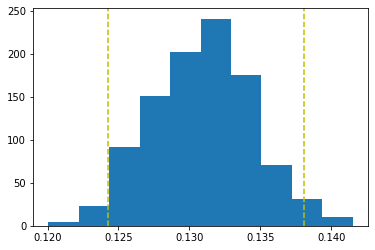

In [81]:
#Repeating steps above for the second problem:

prob_professional_son = np.asarray([sum(i) for i in test[:,[3, 7, 11, 15]]])
prob_professional_son_farm_father = test[:,3]
prob_farm_father_given_professional_son = prob_professional_son_farm_father/prob_professional_son

quantiles = np.quantile(prob_farm_father_given_professional_son, [0.025, 0.975])
print(f'95% Confidence interval is: {quantiles}')
plt.hist(prob_farm_father_given_professional_son)
plt.axvline(x=quantiles[0], ls='--', color='y')
plt.axvline(x=quantiles[1], ls='--', color='y')